# Machine/Sensor Fault Detection

### This dataset contains R dataframe representing fault-free and faulty training datasets for anomaly detection in joint human-automated systems. The data includes 55 columns with process variables sampled every 3 minutes for a duration of 25 hours for datasets. The faults were introduced after 1 hours into the Faulty Training datasets. Column names retain the original variable names.

### Each file is an external representation of an R dataframe that has to be converted into an Python Dataframe with the pyreader function. The variables loaded are named ‘fault_free_training’ and ‘faulty_training’, corresponding to the recorded machine fault data.

#### Each dataframe contains 55 columns:

#### Column 1 ('faultNumber') ranges from 1 to 20 in the “Faulty” datasets and represents the fault type in the TEP. The “FaultFree” datasets only contain fault 0 (i.e. normal operating conditions).

#### Column 2 ('simulationRun') ranges from 1 to 500 and represents a different random number generator state from which a full TEP dataset was generated (Note: the actual seeds used to generate training and testing datasets were non-overlapping).

#### Column 3 ('sample') ranges either from 1 to 500 (“Training” datasets). The TEP variables (columns 4 to 55) were sampled every 3 minutes for a total duration of 25 hours. Note that the faults were introduced 1 hours into the Faulty Training datasets.

#### Columns 4 to 55 contain the process variables; the column names retain the original variable names.

In [8]:
# ! pip3 install scikit-learn --upgrade
# ! pip3 install numpy --upgrade
# ! pip3 install scipy --upgrade 
# ! pip3 install threadpoolctl --upgrade
# ! pip install pyreadr

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ritik\\AppData\\Roaming\\Python\\Python39\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Check the permissions.



In [6]:
# importing necessary libraries
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
# we have without fault data and fault data given seperated

# converting r dataframe into pandas dataframe
df_fault_free = pyreadr.read_r(r'Downloads/Machine_fault_data/TEP_FaultFree_Training.RData')['fault_free_training']
df_faulty = pyreadr.read_r(r'Downloads/Machine_fault_data/TEP_Faulty_Training.RData')['faulty_training']

df = pd.concat([df_fault_free,df_faulty]) # Join both fault free and faulty dataset
df.head()

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0          0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1          0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2          0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3          0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4          0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

In [8]:
# Calculate summary statistics for each column
summary = df[df['simulationRun']==1].iloc[:,3:].describe()
print(summary)

            xmeas_1       xmeas_2       xmeas_3       xmeas_4       xmeas_5  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean       0.265576   3661.241419   4505.710048      9.348456     26.904955   
std        0.143596     41.840258    103.764946      0.299329      0.235383   
min       -0.003183   3470.900000   3884.300000      7.494400     25.592000   
25%        0.225830   3636.800000   4473.000000      9.269300     26.764000   
50%        0.251195   3661.250000   4506.700000      9.352200     26.897000   
75%        0.282177   3686.500000   4545.600000      9.442225     27.056000   
max        1.005200   3820.200000   5013.300000     11.157000     28.077000   

            xmeas_6       xmeas_7       xmeas_8       xmeas_9      xmeas_10  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean      42.352988   2716.501076     74.965782    120.400574      0.346336   
std        0.290591     68.489751      1.200865    

### Box-Plot for each Features

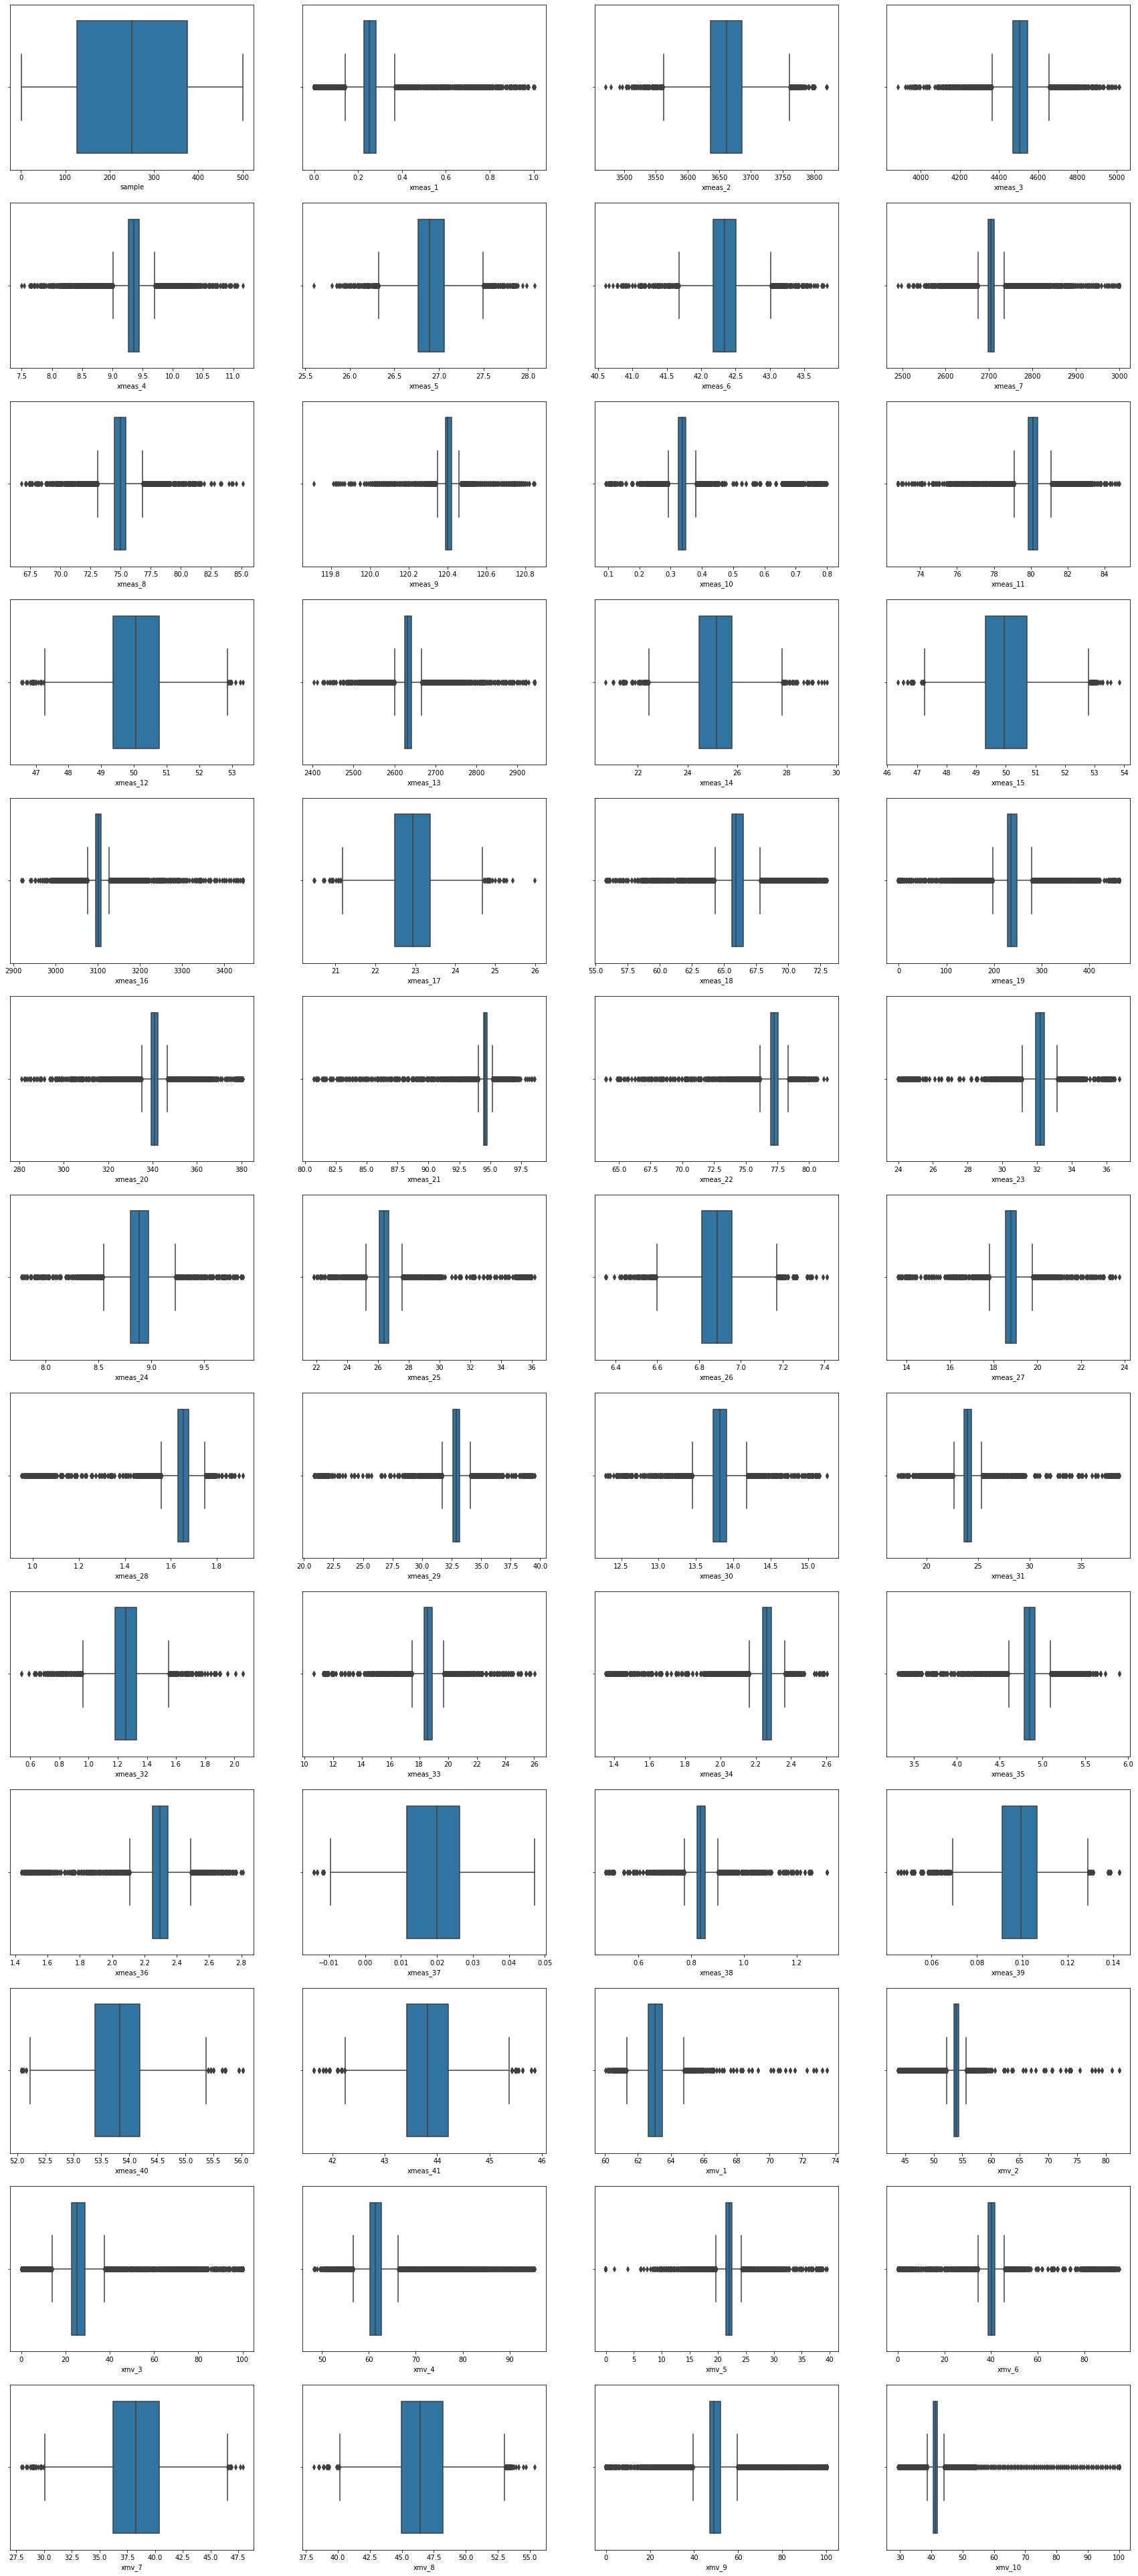

In [9]:
# Create a box plot for each variable
data = df[df['simulationRun']==1].reset_index()
    
fig, ax = plt.subplots(13,4,figsize=(30,70)) #adding subplots

for i,column in enumerate(data.columns[3:]):   #select all the feature columns to plot
    # handling index out of range errors using try and except
    try:
        sns.boxplot(data=data,x=column,ax=ax.ravel()[i])
    except:
        None

Refering to above plots, there are insights we observe, features like xmeas_1, xmeas_5, xmeas_9 has very less variation in their data and they might not be useful for predicting the fault, just based on this visualisation. 

### Kernel Density plot for each feature
A KDE (Kernel Density Estimate) plot is a type of graph used to visualize the distribution of data. It is essentially a smoothed version of a histogram, where the y-axis represents the density of data points rather than their count.

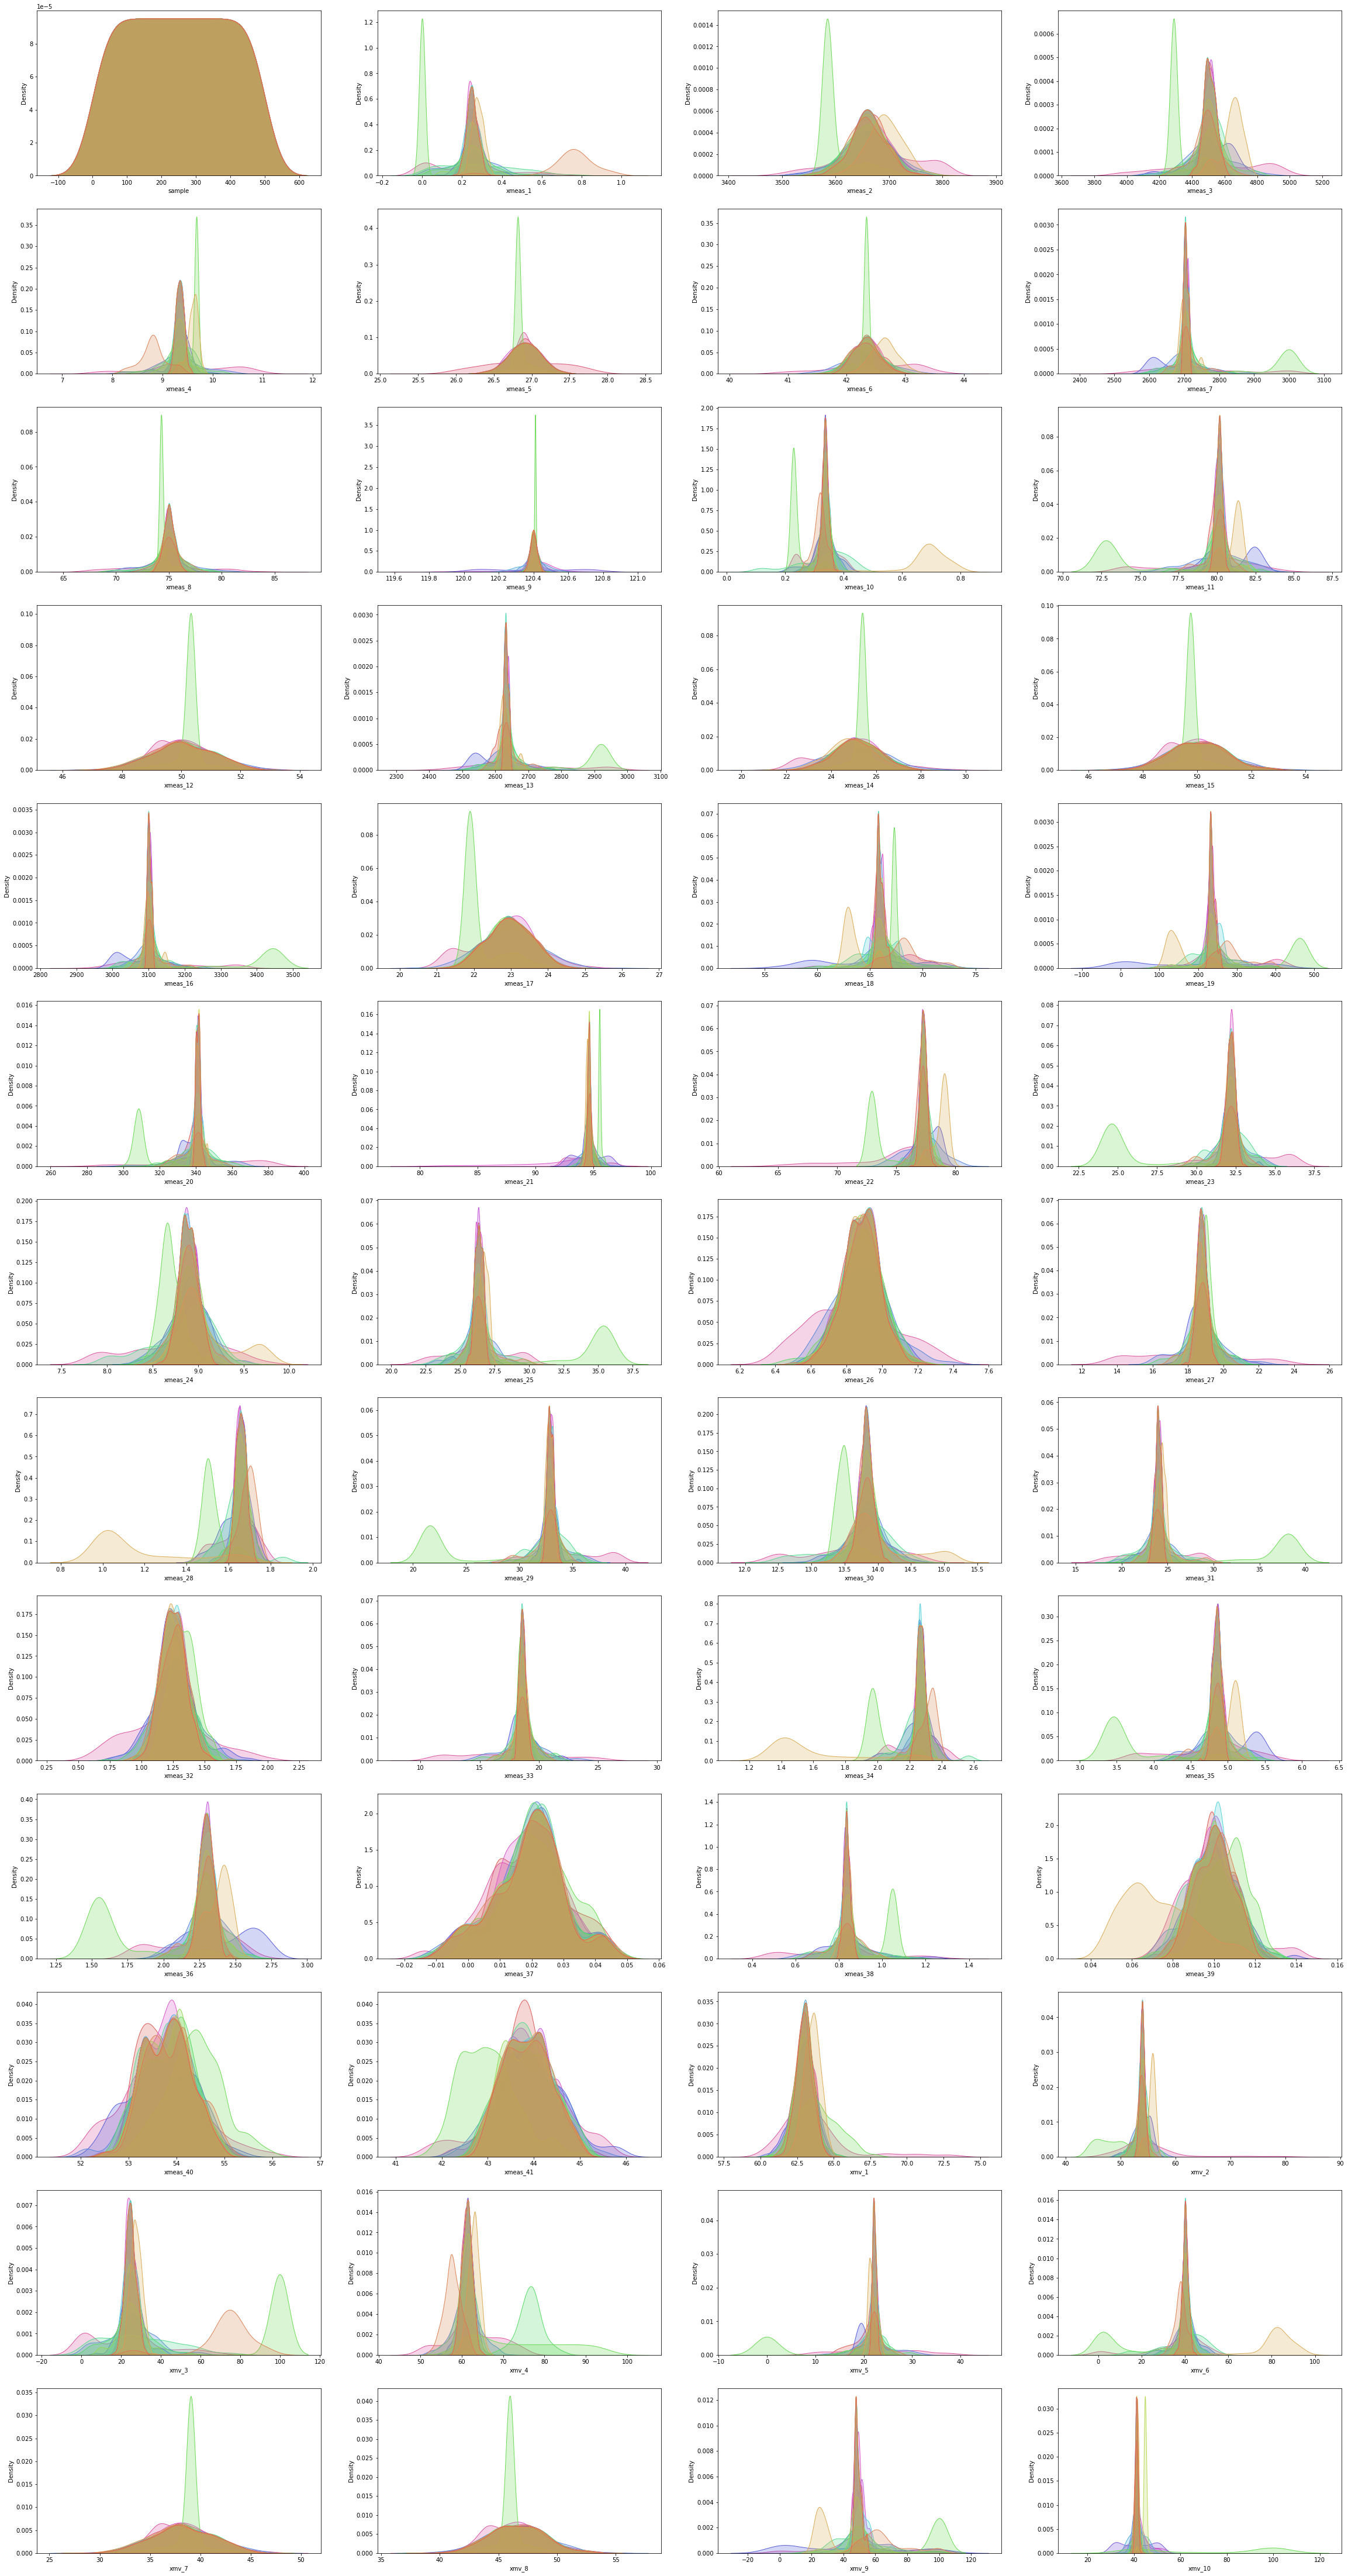

In [10]:
# KDE plot for each variable
    
fig, ax = plt.subplots(13,4,figsize=(40,80))

for i,column in enumerate(data.columns[3:]):   #select all the feature columns to plot
    # handling index out of range errors using try and except
    try:
        sns.kdeplot(data=data, x=column, hue="faultNumber", palette="hls", ax=ax.ravel()[i], fill=True, legend=False)
    except:
        None

## Applying Unsupervised Method to find Anomalies

### -- Principal Component analysis for Anomaly Detection
When performing PCA, the algorithm tries to find the principal components that capture the maximum amount of variance in the data. The principal components are computed based on the covariance matrix of the data, and the eigenvalues of this matrix indicate the amount of variance that each principal component captures. Outliers can significantly affect the covariance matrix, leading to changes in the eigenvalues and principal components.

In general, outliers tend to have a higher reconstruction error because they are more difficult to represent accurately using a reduced set of principal components. The principal components are computed based on the average behavior of the data, so outliers that do not follow this behavior well may require more principal components to represent them accurately. Therefore, outliers tend to have a higher reconstruction error in PCA

In [11]:
# This is very important before you apply PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scaling data using standard scaler for better outcomes 
sc = StandardScaler()
# scaling only on faultfree data to consider mean and variance of fault free data
fault_free = df[df['faultNumber']==0].iloc[:,3:] 

df_scaled = sc.fit_transform(fault_free) # scaled output


# Applying PCA to transforma data into principal componets and find explained variance 
pca = PCA() 
X_pca = pca.fit_transform(df_scaled)

### Visualizing Explained Variance from PCA

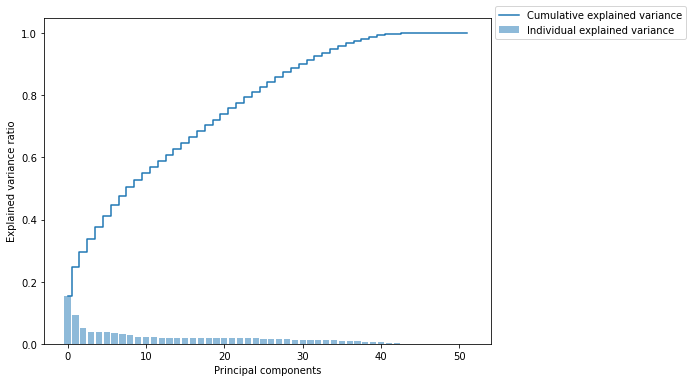

In [12]:
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.rcParams['figure.figsize'] = [8, 6]
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='upper right',bbox_to_anchor=(1.45, 1.05))
# plt.tight_layout()
plt.show()

We can clearly see that, if we have to gain 90% varience of data, we can use approx 30 features.

#### Reconstructing PCA to calculate and find anomalies
for this anomaly detection we are assuming that we only have fault free data of machine and we are us9ing that data to get our threshold, above which to be considered as anomalies, thats why we only using fitted scaled and fitted PCA of fault free data. 

In [13]:
# from sklearn.decomposition import PCA

pca_anomaly = PCA(n_components=0.9) # only considering variables giving aggregate 90% variance

# applying on scaled fault free data to learn non faulty parameters that we use to find anomalies
X_pca = pca_anomaly.fit_transform(df_scaled) 


# Function to Reconstruct the PCA to original and calculate Mean Squared Error 
def recon_loss(pca,X):
    #'pca' is the alredy fitted model on the "Fault-Free" data
    X_pca = pca.transform(X)
    X_recon = pca.inverse_transform(X_pca)
    reconstruction_loss = np.mean((X-X_recon)**2,axis=1)
    return reconstruction_loss


#### FaultFree data Loss Visualization

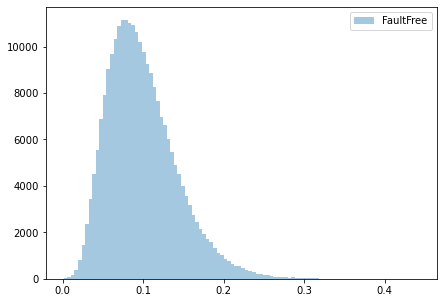

In [14]:
# This is visualization of Reconstruction error of FaultFree data

FaultFree_reconstruction_loss=recon_loss(pca=pca_anomaly, X=df_scaled)

plt.rcParams['figure.figsize'] = [7, 5]
plt.hist(FaultFree_reconstruction_loss, bins=100,label='FaultFree',alpha=0.4)
plt.legend()
plt.show()

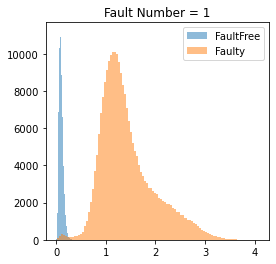

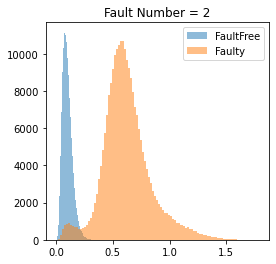

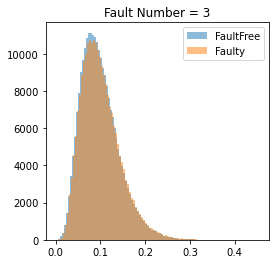

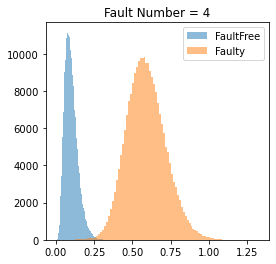

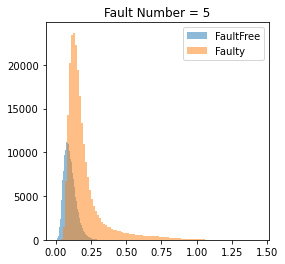

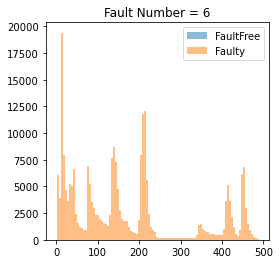

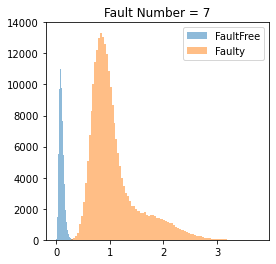

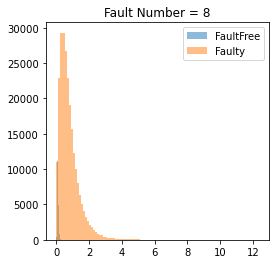

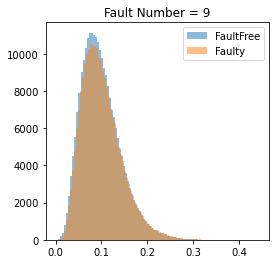

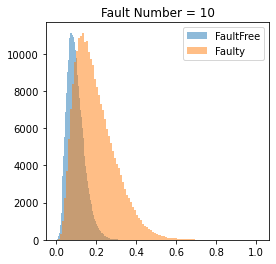

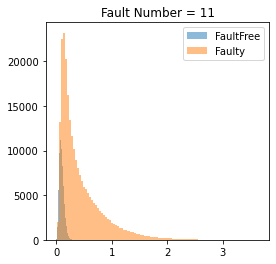

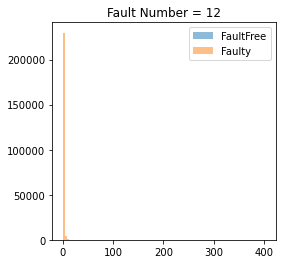

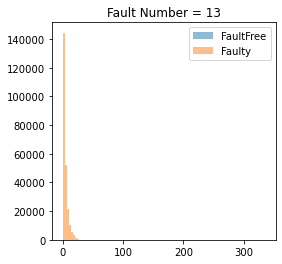

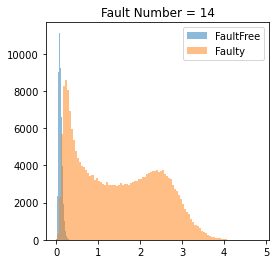

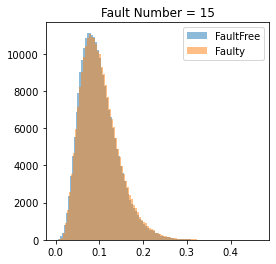

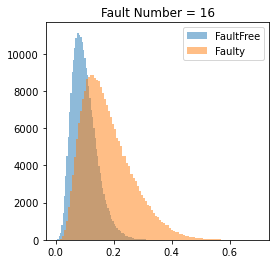

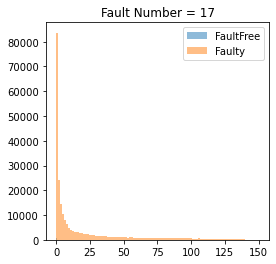

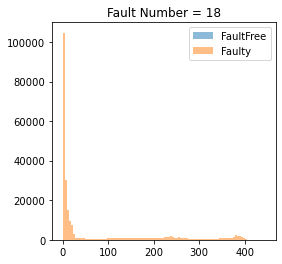

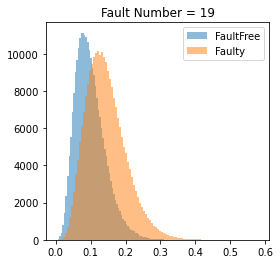

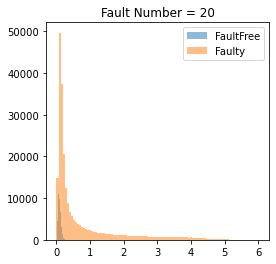

In [15]:
for F_num in range(1,21):
    temp_faulty=df[(df.faultNumber==F_num) & (df['sample'] > 20.0 )] # (sample > 20) because fault was introduced after 20th sample
    
    # Scale the data to standardize
    X_faulty = sc.transform(temp_faulty.iloc[:,3:])
    
    # Obtain the reconstruction loss from the trained PCA
    faulty_reconstruction_loss = recon_loss(pca=pca_anomaly,X=X_faulty)

    
    plt.rcParams['figure.figsize'] = [4, 4]
    plt.hist(FaultFree_reconstruction_loss, bins=100,label='FaultFree',alpha=0.5)
    plt.hist(faulty_reconstruction_loss, bins=100,label='Faulty',alpha=0.5)
    plt.title(f'Fault Number = {F_num}')
    plt.legend()
    plt.show()

### Live Detecting Anomalies
We have to use a threshold to know what values to be considered anomaly and for that we are using statistical method that is setting threshold as mean*3 standard deviation so that we can take 99% percent of data and rest as anomnaly 

In [16]:

# Obtain mean and standard deviation for 
mu = np.mean(FaultFree_reconstruction_loss)
std = np.std(FaultFree_reconstruction_loss)


# Obtain threshold from mu and std
threshold = mu+3*std
threshold

0.22905972566161936

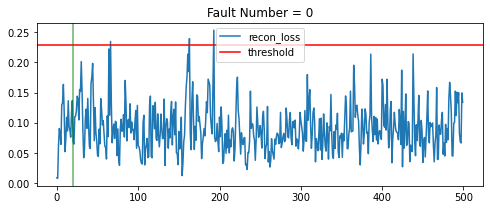

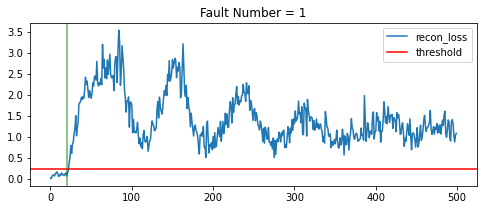

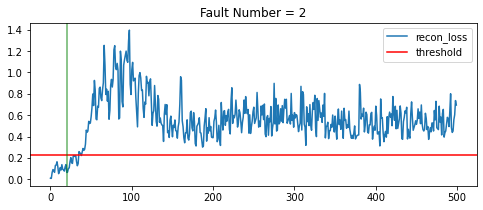

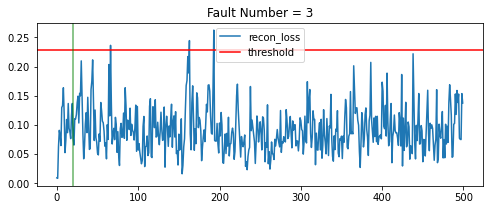

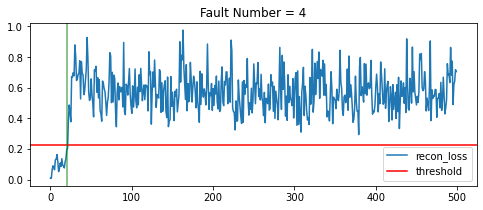

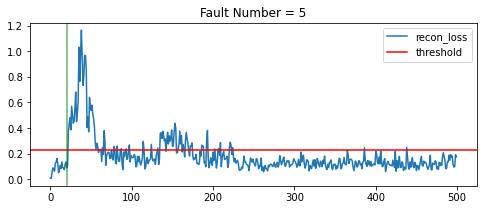

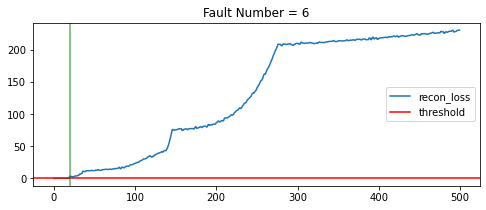

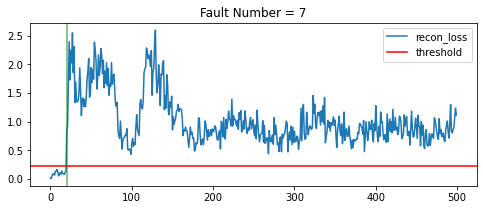

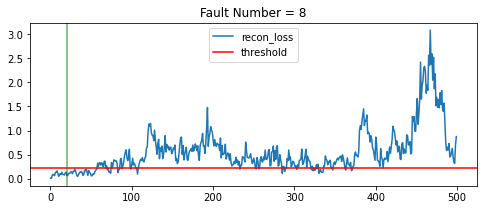

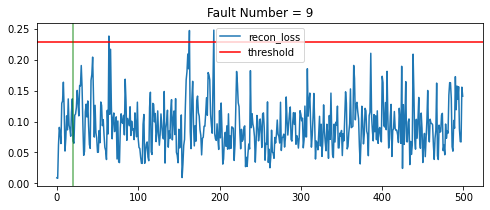

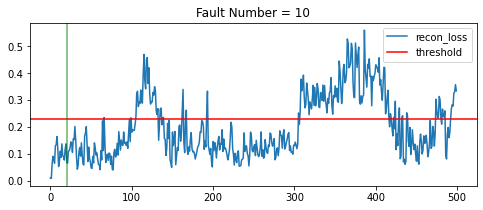

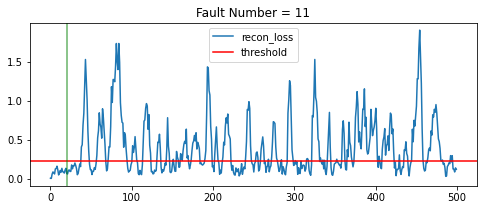

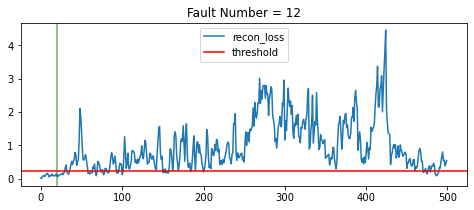

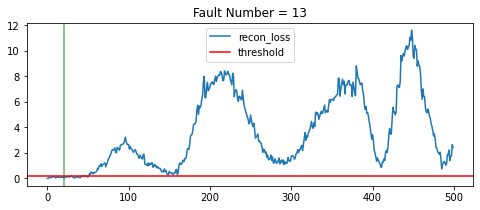

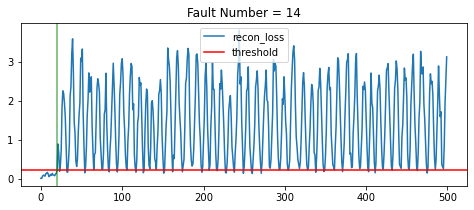

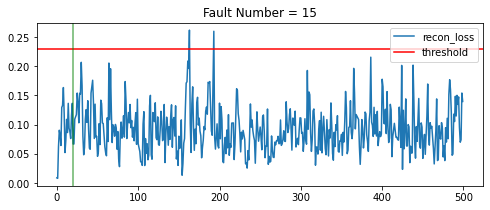

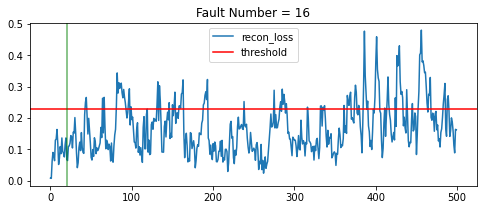

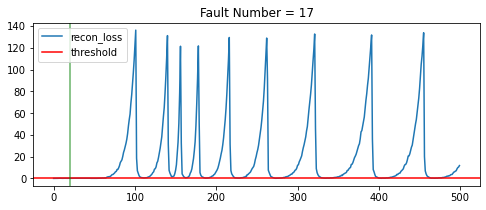

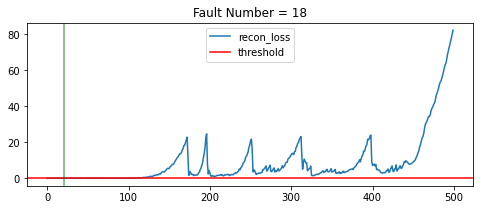

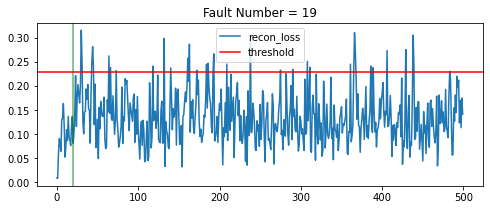

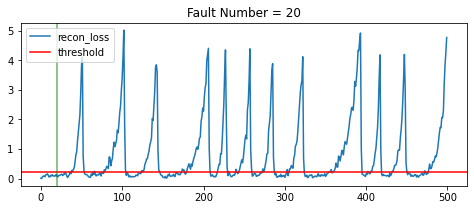

In [17]:
for F_num in range(0,21):
    # store the required fault class and simulation run
    temp = df[(df.faultNumber==F_num) & (df.simulationRun==1 )] # only using only 1 simulation as this is huge dataset
    
    # Standardization
    X_faulty = sc.transform(temp.iloc[:,3:])
    
    # Obtain reconstruction loss
    faulty_reconstruction_loss = recon_loss(pca=pca_anomaly,X=X_faulty) 

    plt.rcParams['figure.figsize'] = [8, 3]
    plt.plot(faulty_reconstruction_loss,label=f'recon_loss')
    plt.axhline(threshold,c='r',label='threshold')    #threshold value
    plt.axvline(20,c='g',alpha=0.6) #time of fault introduction
    plt.title(f'Fault Number = {F_num}')
    plt.legend()
    plt.show()

## Anomalies Evaluation
##### Since we already have the labels of actual faults, we can compare true label and predictions for the same
#### Confusion Matrix for each Error values:-

In [18]:
# getting the faults above thresholds as integer 1 rest as 0 to put y_labels for predictions
def combine_result(x,threshold):
    # IF reconstruction loss is grater than threshold THEN its a fault
    result= x > threshold
    result_float = [float(val) for val in result] 
    return result_float

# plotting confusion matrix for each error type i.e = untill 20
for Fnum in [x for x in range(0,21)]:

    temp_df = df[ (df['faultNumber']==Fnum) & (df['simulationRun']==np.random.randint(1,500)) ]
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    faulty_reconstruction_loss = recon_loss(pca=pca_anomaly,X=X_faulty) 
    
    #Obtain result using threshold testin of reconstruction loss
    result = combine_result(x=faulty_reconstruction_loss,threshold=threshold)
    
    #populate the true value (y_true) based of Fnum
    y_pred = combine_result(x=faulty_reconstruction_loss,threshold=threshold)
    if Fnum==0:
        y_true = np.repeat(0, len(y_pred))
    else:
        y_true = np.repeat(1, len(y_pred))
        y_true[0:21]=0 # Beacuse the fault was introduced after 20th sample
        

    # Obtain F1 score    
    from sklearn.metrics import f1_score,accuracy_score
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    print(f'The F1-Score for Fault_num={Fnum} is {f1}')
    print(f'The Accuracy-Score for Fault_num={Fnum} is {acc}')
    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

The F1-Score for Fault_num=0 is 0.49849548645937813
The Accuracy-Score for Fault_num=0 is 0.994
[[497   3]
 [  0   0]]
The F1-Score for Fault_num=1 is 0.9878496269835484
The Accuracy-Score for Fault_num=1 is 0.998
[[ 21   0]
 [  1 478]]
The F1-Score for Fault_num=2 is 0.8675847457627118
The Accuracy-Score for Fault_num=2 is 0.972
[[ 21   0]
 [ 14 465]]
The F1-Score for Fault_num=3 is 0.04246794871794872
The Accuracy-Score for Fault_num=3 is 0.044
[[ 21   0]
 [478   1]]
The F1-Score for Fault_num=4 is 0.9878496269835484
The Accuracy-Score for Fault_num=4 is 0.998
[[ 21   0]
 [  1 478]]
The F1-Score for Fault_num=5 is 0.2570827559725538
The Accuracy-Score for Fault_num=5 is 0.288
[[ 21   0]
 [356 123]]
The F1-Score for Fault_num=6 is 0.9872835016149952
The Accuracy-Score for Fault_num=6 is 0.998
[[ 20   1]
 [  0 479]]
The F1-Score for Fault_num=7 is 0.9739583333333333
The Accuracy-Score for Fault_num=7 is 0.996
[[ 19   2]
 [  0 479]]
The F1-Score for Fault_num=8 is 0.6673248626373626
The

### Overall F1 score and Accuracy Score

In [19]:
F1_all = [] #initialize the emplty list of F1 score
Acc_all = []
for Fnum in [x for x in range(0,21) if x not in [3,9]]:

    temp_df = df[ (df['faultNumber']==Fnum) & (df['simulationRun']==np.random.randint(1,500))]
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    faulty_reconstruction_loss = recon_loss(pca=pca_anomaly,X=X_faulty) 
    
    
    
    y_pred = combine_result(x=faulty_reconstruction_loss,threshold=threshold)
    if Fnum==0:
        y_true = np.repeat(0, len(y_pred))
    else:
        y_true = np.repeat(1, len(y_pred))
        y_true[0:21]=0 # Beacuse the fault was introduced after 20th sample

    # Obtain F1 score    
    from sklearn.metrics import f1_score,accuracy_score
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    F1_all.append(f1)
    Acc_all.append(acc)
    
print(f'The mean F1-Score for PCA-reconstruction method is {np.mean(np.array(F1_all))}')
print(f'The mean Accuracy-Score for PCA-reconstruction method is {np.mean(np.array(Acc_all))}')

The mean F1-Score for PCA-reconstruction method is 0.6017410321793356
The mean Accuracy-Score for PCA-reconstruction method is 0.7135789473684211


#### We have concluded our Unsupervised approach to find faults/anomalies using sensor data, we started with using some boxplots to find pattern of data and used kde plot to know the distribution, after that scaled the data because we observ each sensor data has different in measurement units then applied PCA anomay detection technique to get vmax varience of data but les than original data to reconstruct data then find the errors and the anomalous data has high rate of errors then defined the threshold to find anomaly or faults. 

#### We know there are labels already presented in this data and next we are gong to use supervised Artifical Neural Network technique to classify errors or fault of data. 

## Deep Learning Approach:-

### Analysing and Treating Correlated features 

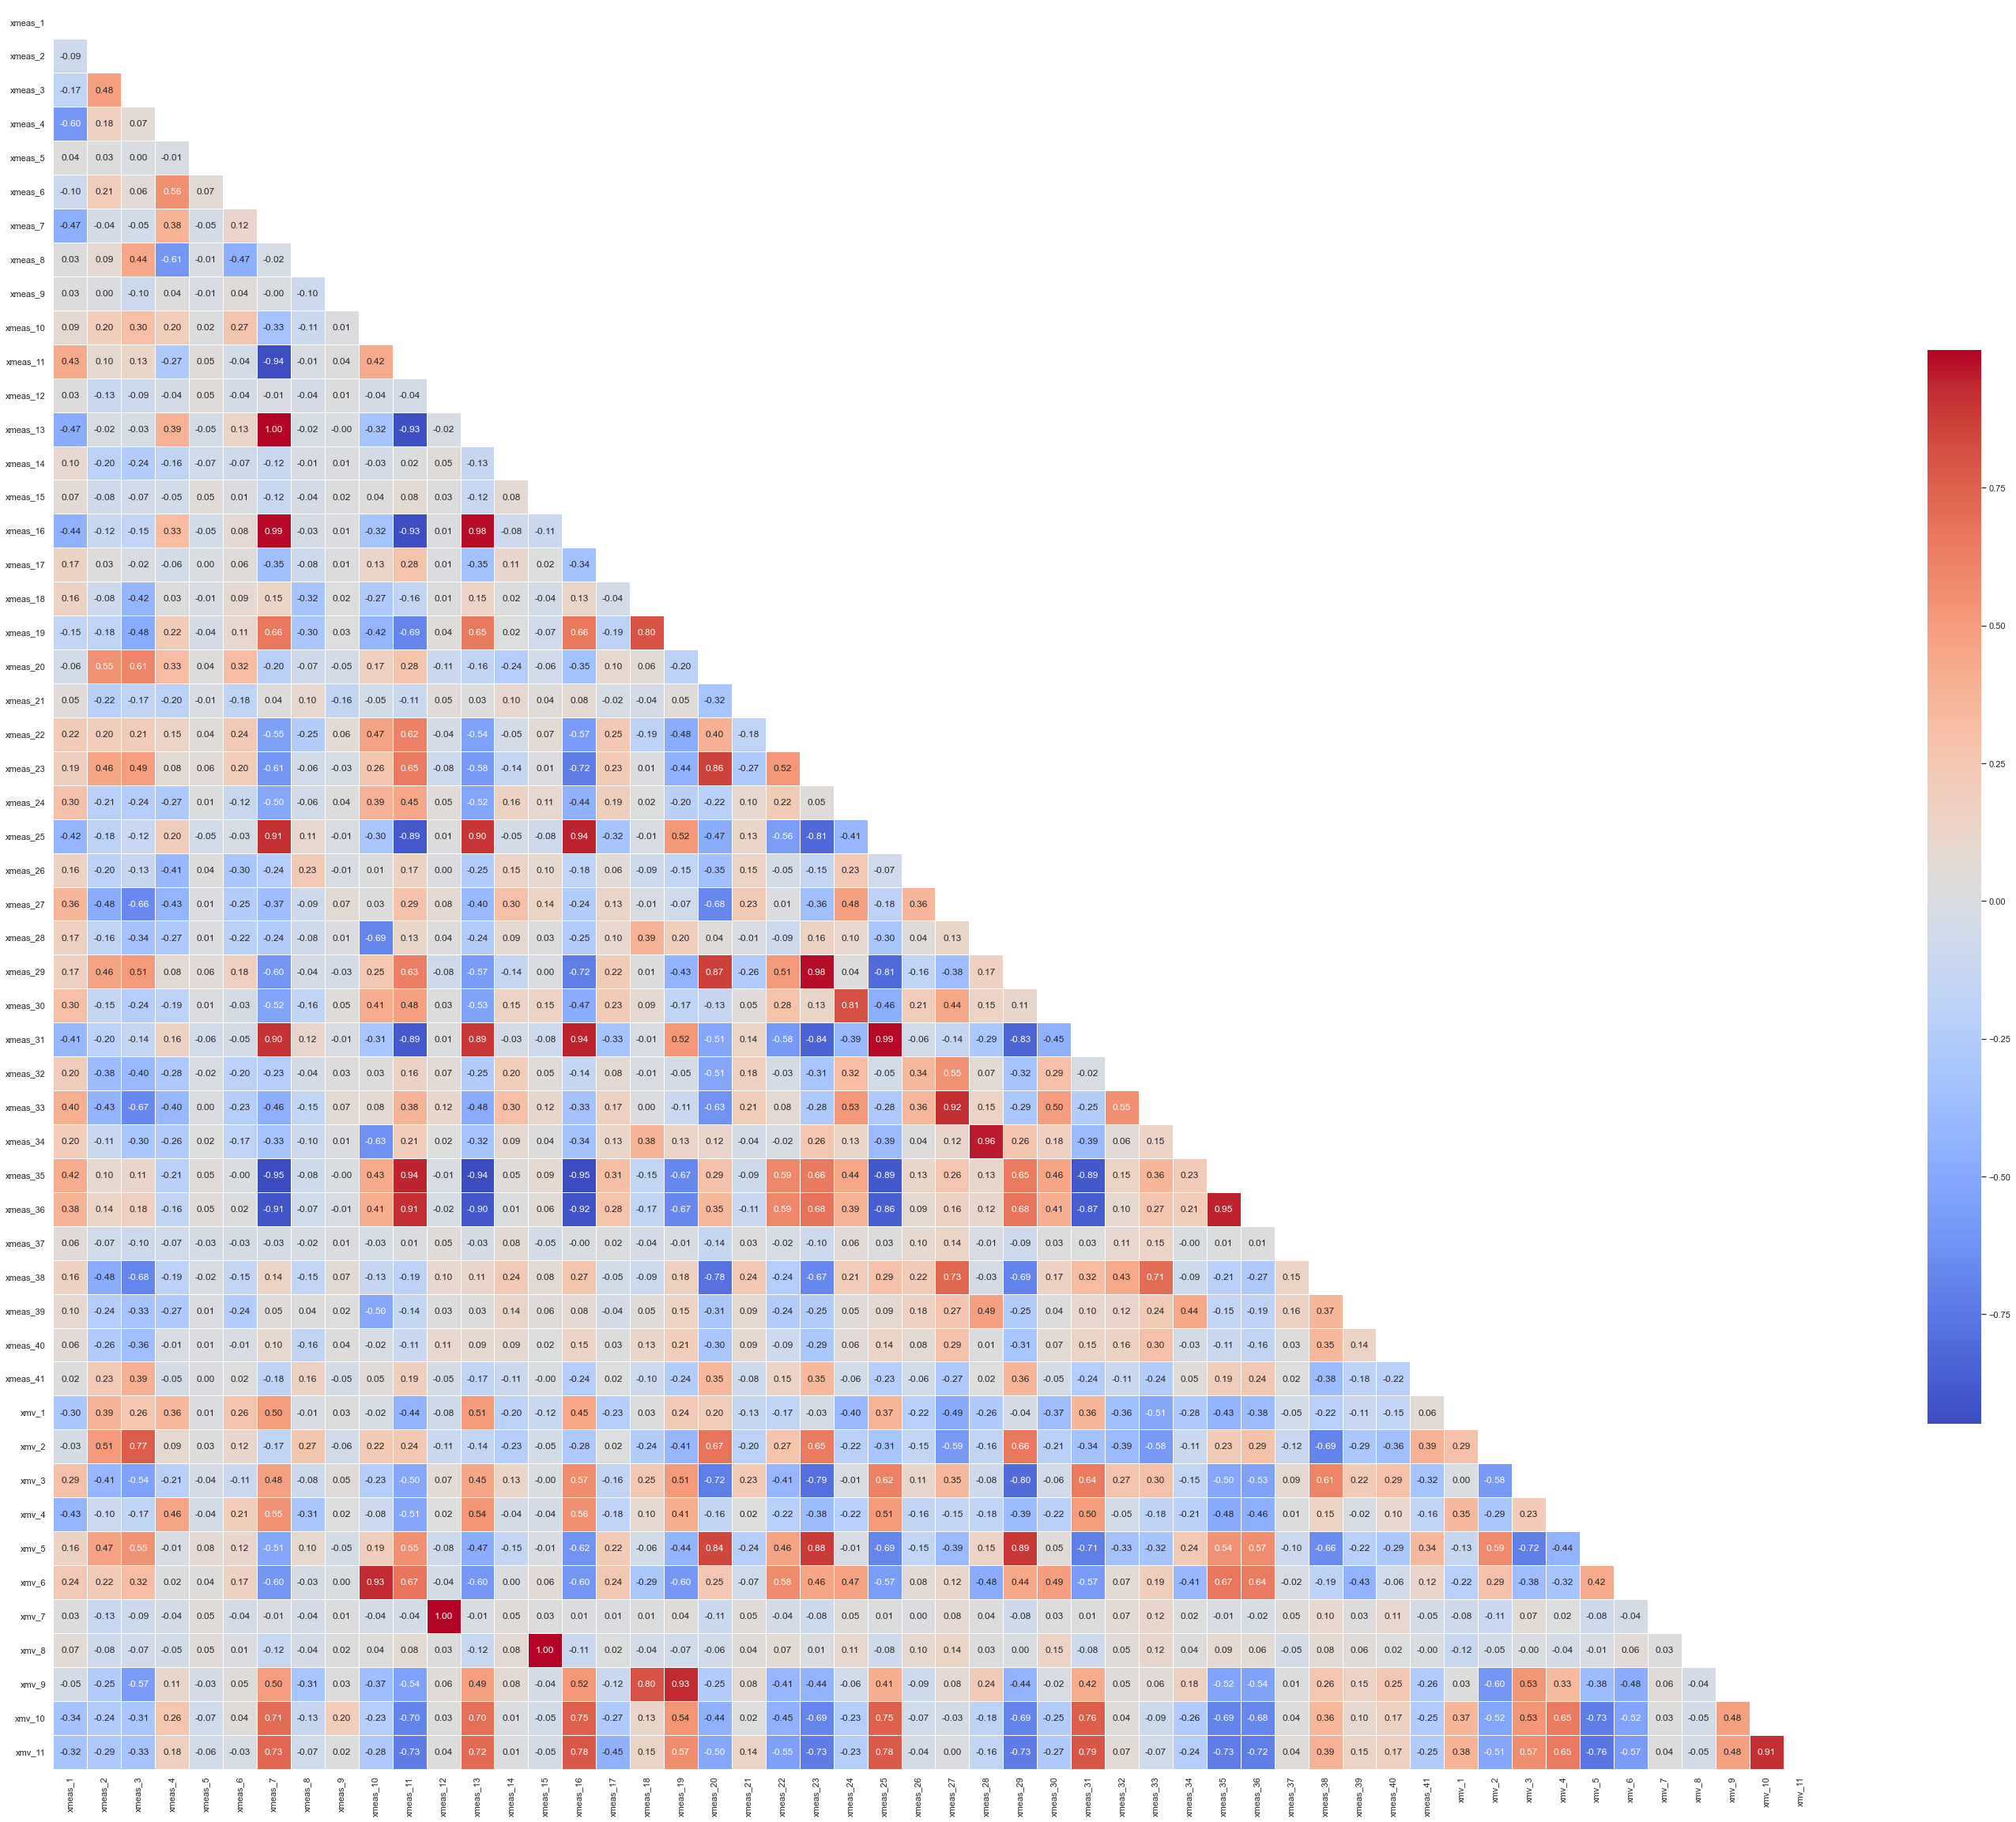

In [20]:
# Load the data into a pandas DataFrame
data = df[df['simulationRun']==1].iloc[:,3:]

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap with annotations
sns.set(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

With help of this visualisation, we can clearly see that several independent features are highly correlated i.e high level of multicolinearity and it doesn't makes sense to use both of them if one of them is enough to use for predictions so we have deicided to remvoe correlated features more than 90% 

In [21]:
# Calculate the correlation matrix
corr_matrix = df.iloc[:,3:].corr()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(len(to_drop)); print(to_drop)

12
['xmeas_13', 'xmeas_16', 'xmeas_25', 'xmeas_29', 'xmeas_31', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmv_6', 'xmv_7', 'xmv_8']


In [22]:
# dropping columns that are correlated more than 90% 
data = df.loc[(df['simulationRun'] >= 1) & (df['simulationRun'] <= 50)]
reduced_data = data.drop(columns=to_drop, axis=1)

# removing fault number 3,9,15 as this fualts are hard to seperate from other faults, thus resulting in bad predictions, "mentioned in research paper"
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

reduced_data

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  \
0               0.0            1.0       1  0.25038   3674.0   4529.0   
1               0.0            1.0       2  0.25109   3659.4   4556.6   
2               0.0            1.0       3  0.25038   3660.3   4477.8   
3               0.0            1.0       4  0.24977   3661.3   4512.1   
4               0.0            1.0       5  0.29405   3679.0   4497.0   
...             ...            ...     ...      ...      ...      ...   
499995         20.0           50.0     496  0.21863   3705.3   4555.1   
499996         20.0           50.0     497  0.27959   3711.2   4561.6   
499997         20.0           50.0     498  0.27948   3678.6   4527.6   
499998         20.0           50.0     499  0.23251   3673.5   4560.6   
499999         20.0           50.0     500  0.23593   3671.5   4566.8   

        xmeas_4  xmeas_5  xmeas_6  xmeas_7  ...  xmeas_40  xmeas_41   xmv_1  \
0        9.2320   26.889   42.402   2704.3  ...    53.724    43.828  62.881   
1        9.4264   26.721   42.576   2705.0  ...    53.724    43.828  63.132   
2        9.4426   26.875   42.070   2706.2  ...    53.724    43.828  63.117   
3        9.4776   26.758   42.063   2707.2  ...    53.724    43.828  63.100   
4        9.3381   26.889   42.650   2705.1  ...    53.724    43.828  63.313   
...         ...      ...      ...      ...  ...       ...       ...     ...   
499995   9.3973   26.896   42.473   2708.7  ...    54.153    44.409  63.509   
499996   9.2510   27.050   42.205   2709.1  ...    54.153    44.409  62.684   
499997   9.4976   27.271   42.264   2708.8  ...    54.153    44.409  63.245   
499998   9.2953   26.692   42.602   2708.1  ...    54.153    44.409  63.697   
499999   9.3139   27.029   42.155   2706.8  ...    54.153    44.409  63.731   

         xmv_2   xmv_3   xmv_4   xmv_5   xmv_9  xmv_10  xmv_11  
0       53.744  24.657  62.544  22.137  47.510  41.258  18.447  
1       53.414  24.588  59.259  22.084  47.427  41.359  17.194  
2       54.357  24.666  61.275  22.380  47.468  41.199  20.530  
3       53.946  24.725  59.856  22.277  47.658  41.643  18.089  
4       53.658  28.797  60.717  21.947  47.346  41.507  18.461  
...        ...     ...     ...     ...     ...     ...     ...  
499995  54.633  21.272  63.124  18.664  53.645  41.972  19.481  
499996  54.083  27.556  63.721  18.311  53.826  40.726  15.319  
499997  54.490  27.566  60.983  18.306  53.515  41.398  20.644  
499998  54.095  22.927  63.605  17.713  53.289  41.483  20.183  
499999  54.021  22.590  60.904  17.859  53.156  41.151  19.949  

[450000 rows x 43 columns]

### Scaling Data

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc.fit(reduced_data.iloc[:,3:])

f_reduce_data = reduced_data[reduced_data['sample']>20] # temporary storing faulty reduced data after 20th sample

X = sc.transform(f_reduce_data.iloc[:,3:])
Y = f_reduce_data['faultNumber'].values

### One Hot Encoding Labels :- 
being a multi-class classification problem we have 18 different labels to predict

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)

# fitting and transforming our labels into one hot encoded
Y_enc = enc.fit_transform(Y.reshape(-1, 1))

Y_enc.shape

(432000, 18)

### Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)


print(x_train.shape)
print(y_train.shape)

(345600, 40)
(345600, 18)


## Training Artificial Neural Network Algorithm

In [26]:
# ! pip3 install numpy --upgrade

from keras.layers import Input, Dense
from keras.models import Model

# Define input layer
inputs = Input(shape=(x_train.shape[1]))

# Define hidden layer with 16 nodes and ReLU activation function
hidden_layer = Dense(100, activation='selu')(inputs)
hidden_layer = Dense(100, activation='selu')(hidden_layer)
# Define output layer with sigmoid activation function for binary classification
outputs = Dense(y_train.shape[1], activation='softmax')(hidden_layer)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with binary cross-entropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 18)                1818      
                                                                 
Total params: 16,018
Trainable params: 16,018
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.callbacks import EarlyStopping

# Define early stopping callback to monitor validation loss and stop if it doesn't improve for 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with 20 epochs and batch size of 32, using the early stopping callback
history = model.fit(x_train, y_train, epochs=200, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stop])


Epoch 1/200
1350/1350 [==============================] - 11s 4ms/step - loss: 1.7675 - accuracy: 0.4404 - val_loss: 1.4203 - val_accuracy: 0.5407
Epoch 2/200
1350/1350 [==============================] - 6s 4ms/step - loss: 1.2424 - accuracy: 0.5970 - val_loss: 1.1116 - val_accuracy: 0.6339
Epoch 3/200
1350/1350 [==============================] - 7s 5ms/step - loss: 1.0380 - accuracy: 0.6613 - val_loss: 0.9558 - val_accuracy: 0.6997
Epoch 4/200
1350/1350 [==============================] - 7s 5ms/step - loss: 0.9310 - accuracy: 0.6909 - val_loss: 0.8840 - val_accuracy: 0.6952
Epoch 5/200
1350/1350 [==============================] - 6s 4ms/step - loss: 0.8651 - accuracy: 0.7148 - val_loss: 0.8285 - val_accuracy: 0.7319
Epoch 6/200
1350/1350 [==============================] - 5s 4ms/step - loss: 0.8012 - accuracy: 0.7395 - val_loss: 0.7601 - val_accuracy: 0.7606
Epoch 7/200
1350/1350 [==============================] - 5s 4ms/step - loss: 0.7447 - accuracy: 0.7599 - val_loss: 0.7398 - val_a

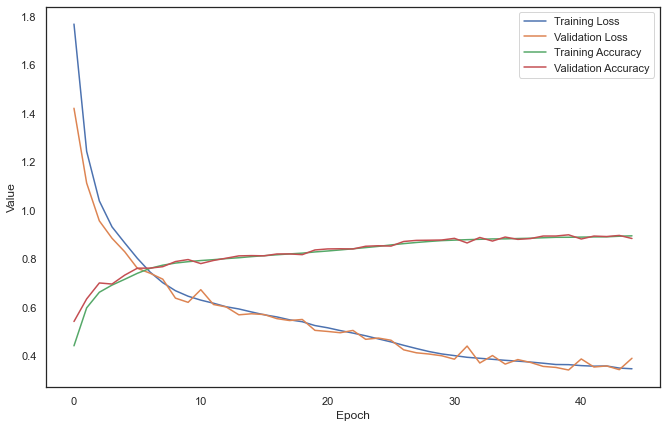

In [28]:
# plotting the train, vaildation accuracy and loss to visually evaluate model performance
plt.rcParams['figure.figsize'] = [11, 7]

# Plot the training history for loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

Above plot show us that the trainig and validation accuracy is almost similar with traing and validation loss similary going down that suggest us this is quite good model which can produce accurate results and detect faults.

### Evaluation

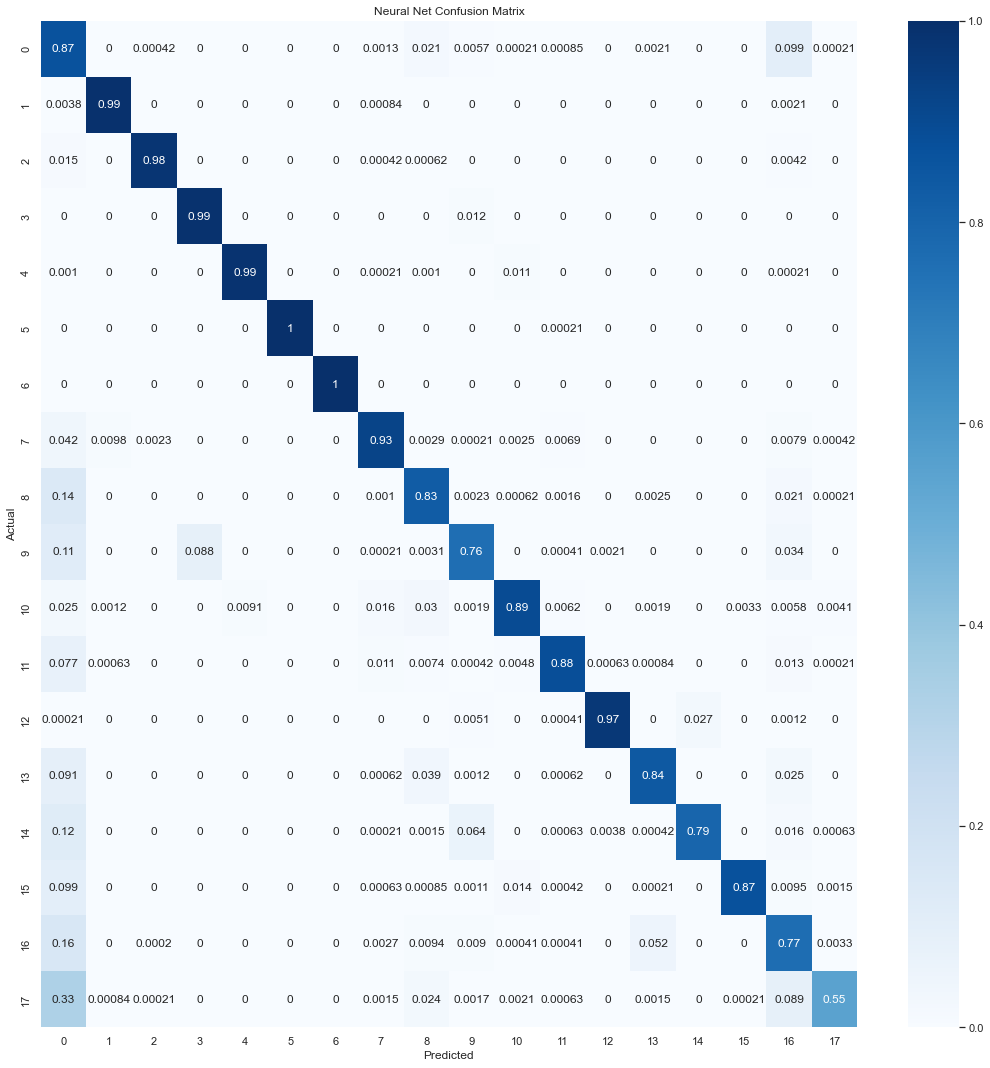

Neural Net accuracy_score: 0.8830439814814814


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

y_pred = enc.inverse_transform(model.predict(x_test, verbose=0))
y_true = enc.inverse_transform(y_test)
    
# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_true, y_pred, 'Neural Net Confusion Matrix')
print("Neural Net accuracy_score:", accuracy_score(y_true, y_pred))

We can see from the confusion matrix that the diagonals are true positive valeus which in most cases are above 90% and it shows that our model is able detect faults most of the cases, lets see the live detection for each seperate error type. 

### Real-time Detection

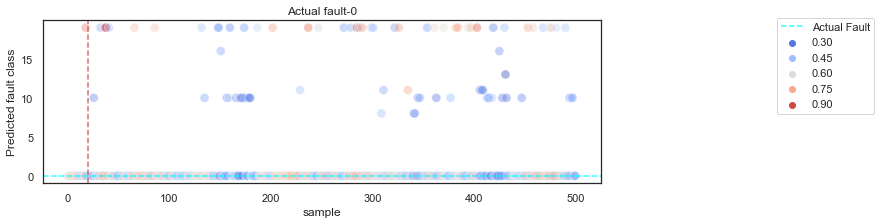

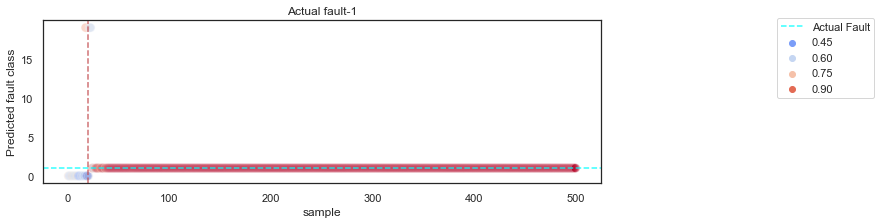

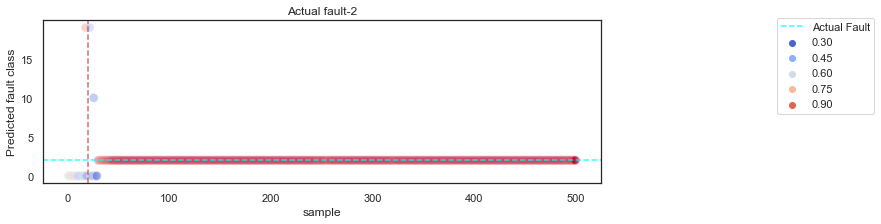

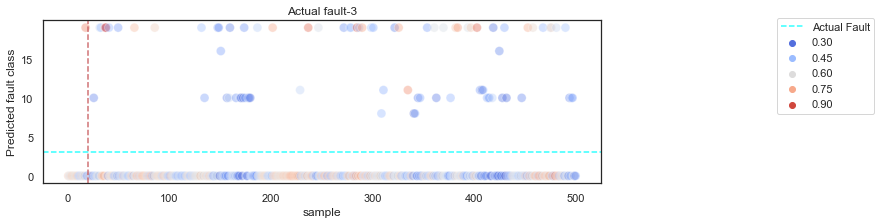

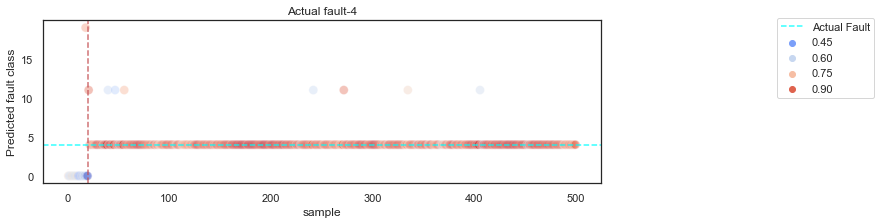

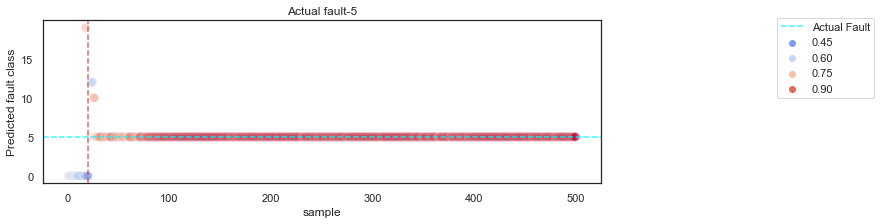

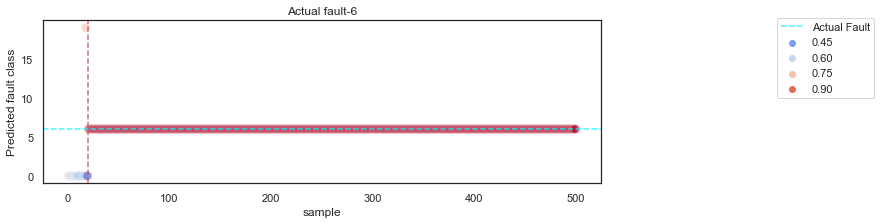

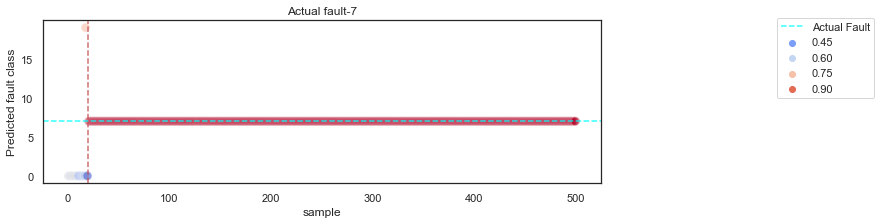

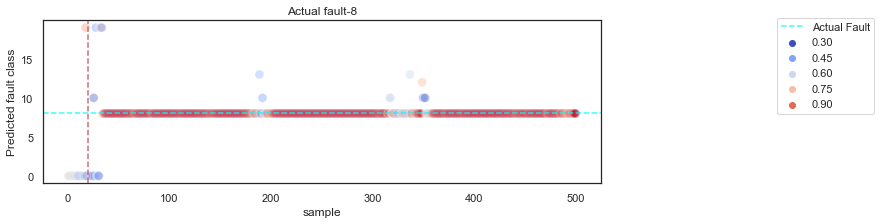

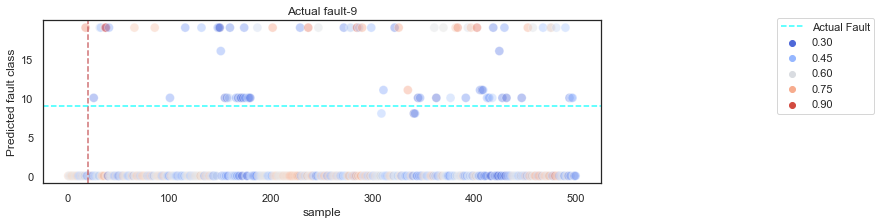

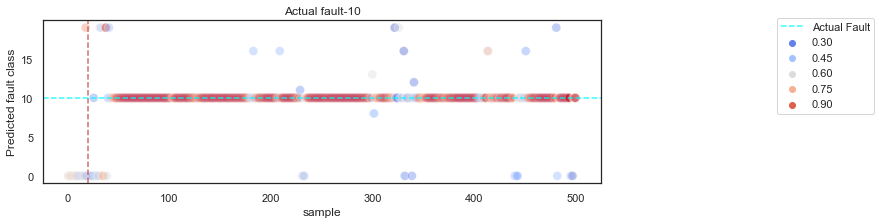

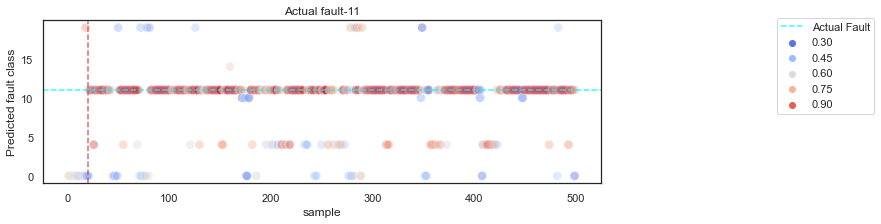

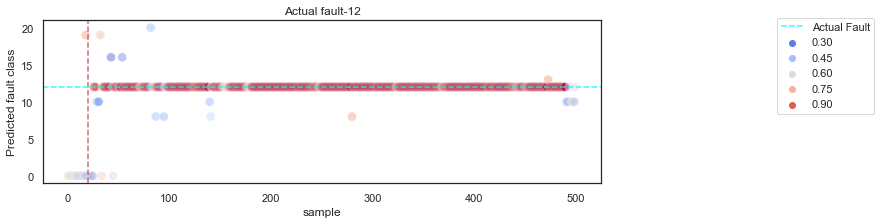

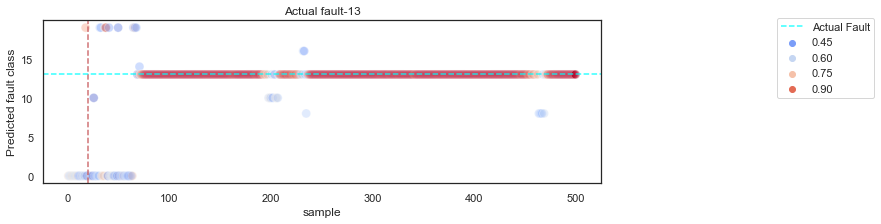

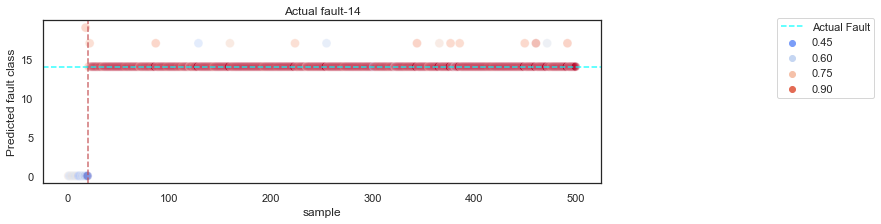

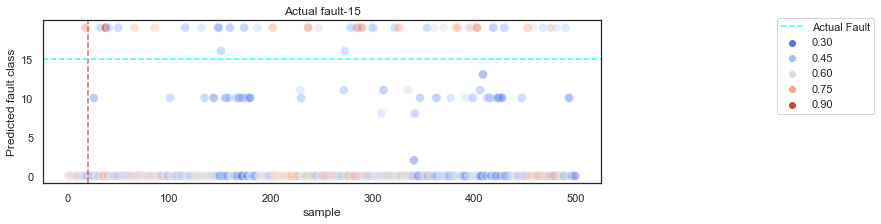

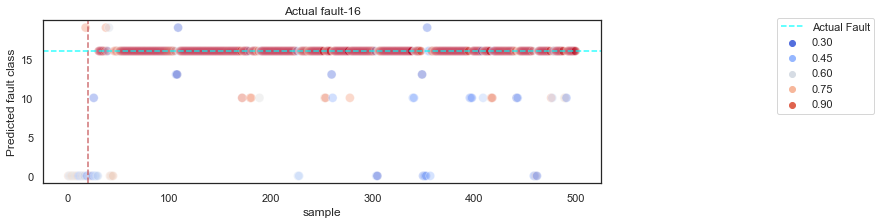

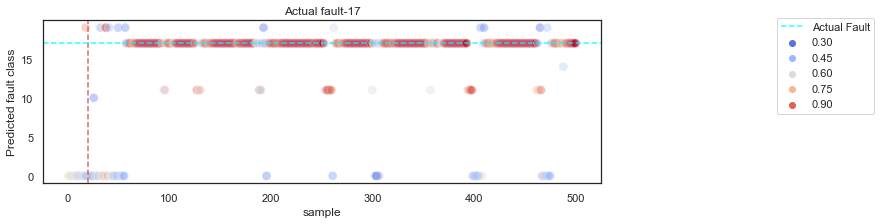

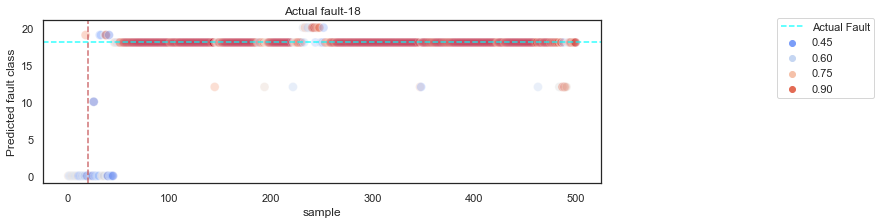

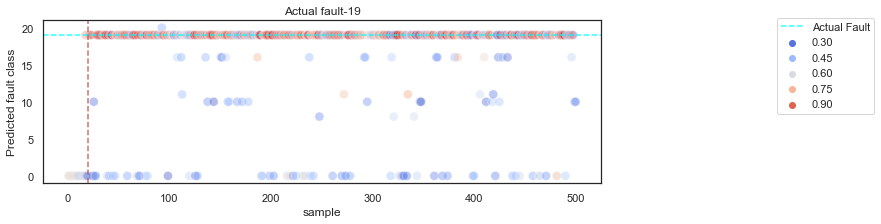

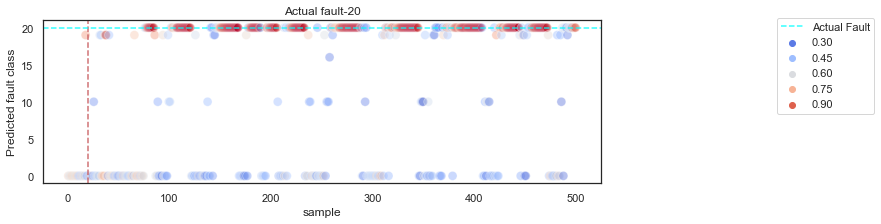

In [30]:
# iterate through fault numbers from 0 to 20
for F_num in range(0,21):
    # select data corresponding to current fault number and simulation run
    df_new= df[(df['faultNumber']==F_num) & (df['simulationRun']==2)].drop(columns=to_drop, axis=1)
    
    # select the columns to be used for prediction
    x_new = df_new.iloc[:,3:]
    
    # apply a scaling to the selected columns
    x_new = sc.transform(x_new)

    # use the NN model to predict the fault class and reverse transform one hot encoded data 
    y_pred = enc.inverse_transform(model.predict(x_new, verbose=0))
    
    # calculate the probability of each prediction
    y_proba = np.max(model.predict(x_new, verbose=0),axis=1)

    # create a scatter plot to visualize the predictions against the sample number
    f, ax = plt.subplots(figsize=(10,3))
    sns.scatterplot(x=df_new['sample'],y=y_pred[:,0],hue=y_proba,palette="coolwarm",s=80,alpha=0.4)
    
    # add a vertical line to indicate the 20th sample
    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    
    # add a horizontal line to indicate the actual fault number
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    
  
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.title(f'Actual fault-{F_num}')
    plt.show()


As expected our basic Neural network is comparatively giving high accursacy than PCA anomaly detection technique and no doubt that we just use a basic nerual network algorithm with 2 hidden layers, altough we can add more layers to make it more learable but increasing layers is computationally expensive task.

### Accuracy per Error type

In [31]:
# Create an empty list to store the accuracy scores for each fault type
Accuracy = []

# Loop over the fault types from 0 to 20, except for faults 3, 9, and 15
for Fnum in [x for x in range(0,21) if x not in [3,9,15]]:

    # Select a random simulation run for the current fault type, after sample 20
    temp_df = df[(df['faultNumber']==Fnum) & (df['sample']>20) & (df['simulationRun']==np.random.randint(1,500))]

    # Transform the input data using the scaler object
    X_faulty = sc.transform(temp_df.iloc[:,3:].drop(columns=to_drop, axis=1))

    # Extract the true fault labels from the DataFrame
    y_true = temp_df['faultNumber']

    # Use the trained model to make predictions on the faulty data
    y_pred = enc.inverse_transform(model.predict(X_faulty, verbose=0))

    # Compute the accuracy score for the current fault type
    acc = accuracy_score(y_true, y_pred)

    # Print the accuracy score for the current fault type and append
    print(f'The accuracy for Fault_num={Fnum} is {acc}')
    Accuracy.append(acc)

    
print("#"*20)

# Compute and print the overall accuracy score across all fault types
print(f'The overall accuracy is {np.mean(Accuracy)}')


The accuracy for Fault_num=0 is 0.8541666666666666
The accuracy for Fault_num=1 is 0.99375
The accuracy for Fault_num=2 is 0.9875
The accuracy for Fault_num=4 is 0.9895833333333334
The accuracy for Fault_num=5 is 0.9770833333333333
The accuracy for Fault_num=6 is 1.0
The accuracy for Fault_num=7 is 1.0
The accuracy for Fault_num=8 is 0.8541666666666666
The accuracy for Fault_num=10 is 0.8
The accuracy for Fault_num=11 is 0.71875
The accuracy for Fault_num=12 is 0.9375
The accuracy for Fault_num=13 is 0.9020833333333333
The accuracy for Fault_num=14 is 0.96875
The accuracy for Fault_num=16 is 0.8145833333333333
The accuracy for Fault_num=17 is 0.7958333333333333
The accuracy for Fault_num=18 is 0.7791666666666667
The accuracy for Fault_num=19 is 0.775
The accuracy for Fault_num=20 is 0.5416666666666666
####################
The overall accuracy is 0.8716435185185185


### T-sne Visualization

Text(0.5, 1.0, 'Before training')

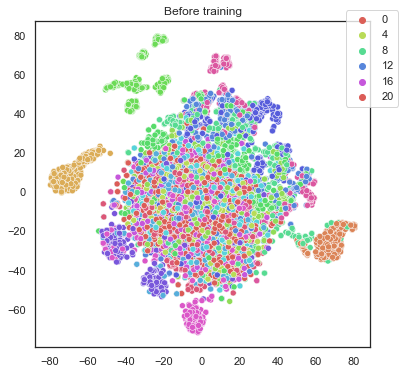

In [32]:
# Import the t-SNE algorithm from the sklearn.manifold module
from sklearn.manifold import TSNE

# Use t-SNE to reduce the dimensionality of the training data to 2D
# Reduce the data to every 50th point to improve performance
x_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(x_train[::50, :])

# Convert the one-hot encoded target values to the original labels
y_label = enc.inverse_transform(y_train[::50, :]).reshape(-1)

# Create a new figure with a size of 6x6 inches
f, ax = plt.subplots(figsize=(6, 6))

# Create a scatterplot of the reduced data, with each point colored by its class label
sns.scatterplot(x=x_embedded[:, 0], y=x_embedded[:, 1], hue=y_label, palette="hls")

# Add a legend to the plot
plt.legend(bbox_to_anchor=(1.1, 1.05))

# Set the title of the plot
plt.title('Before training')

In [33]:
# Import the necessary module
from tensorflow.keras import Model

# Create a new model with the same inputs as the original model
# and outputs from the second last layer
intermediate_model = Model(inputs=model.input,outputs=model.layers[-2].output)

# Print the summary of the intermediate model
intermediate_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
Total params: 14,200
Trainable params: 14,200
Non-trainable params: 0
_________________________________________________________________


216/216 [==============================] - 0s 2ms/step


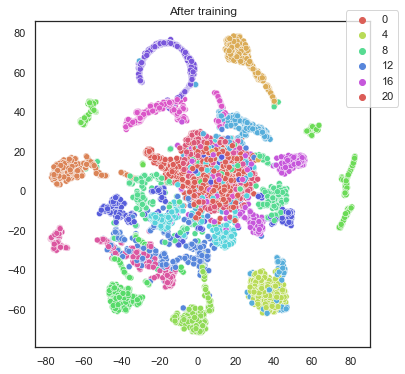

In [34]:
# First, we use the intermediate_model to get the activations of the last hidden layer
# for a subset of the training data
x_inter = intermediate_model.predict(x_train[::50, :])

# We then use t-SNE to reduce the dimensionality of the activations to 2D
x_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(x_inter)

# We use the inverse_transform method of the encoder to get the original labels for the subset of training data
y_label = enc.inverse_transform(y_train[::50, :]).reshape(-1)

# We create a scatter plot to visualize the reduced activations, colored by their original labels
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x_embedded[:, 0], y=x_embedded[:, 1], hue=y_label, palette="hls")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('After training')
plt.show()